In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [122]:
Sig_Eqs=pd.read_csv("earthquakes-2023-10-27_16-35-15_+0800.tsv",delimiter="\t")
Sig_Eqs

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,NaN,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,...,NaN,NaN,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0
6392,NaN,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0
6393,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6394,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN


In [3]:
#Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.
Death=Sig_Eqs[['Country','Deaths']]
Death.groupby(['Country']).sum().sort_values('Deaths', ascending=False).head(10)

,Deaths
Country,
CHINA,2075045.0
TURKEY,1188881.0
IRAN,1011449.0
ITALY,498478.0
SYRIA,439224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,279085.0
ARMENIA,191890.0


array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,
         1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,
         2,  1,  1,  1,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,  2,  1,
         1,  1,  3,  2,  2,  1,  2,  1,  1,  3,  1,  1,  2,  2, 

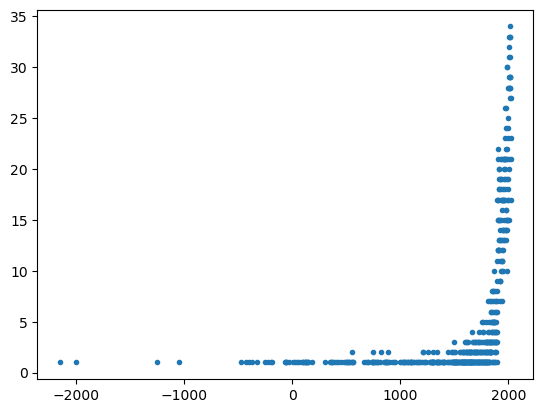

In [297]:
#Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?
Mag=Sig_Eqs[['Year','Mag']]
Mag6=Mag[Mag['Mag']>=6.0]
M=Mag6.groupby('Year').count()
m=M.values
Count=m.reshape(1,len(M.index))

plt.scatter(x=M.index,y=Count,marker='.')
M.index
Count

In [295]:
#Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.
def CountEq_LargestEq(x):

    Sig_Eqs=pd.read_csv("earthquakes-2023-10-27_16-35-15_+0800.tsv",delimiter="\t")

    Sig=Sig_Eqs[Sig_Eqs['Country']==x]

    Sig=Sig[['Mag','Year','Mo','Dy']]

    NUM=len(Sig)

    TEMP=Sig.sort_values('Mag', ascending=False)

    Year=TEMP.iloc[0]
    if  np.isnan(Year['Mo']) and np.isnan(Year['Dy']):
        DAT=str(int(Year['Year']))
    elif np.isnan(Year['Dy']):
        DAT=str(int(Year['Year']))+'-'+str(int(Year['Mo']))
    else:
            Y=str(int(Year['Year']))
            M=str(int(Year['Mo']))
            D=str(int(Year['Dy']))
            DAT=Y+'-'+M+'-'+D
    ALL=[x,NUM,DAT]    
    
    
    return ALL



In [165]:
Sig_Eqs_C=Sig_Eqs['Country']
CTs=Sig_Eqs_C.unique()
L=len(CTs)
data=CountEq_LargestEq(CTs[1])
Table= {'name':[CTs[1]],'number':[data[1]],'date':[data[2]]}
df1 = pd.DataFrame(Table)
for i in range(2,157):
    data=CountEq_LargestEq(CTs[i])
    df1.loc[len(df1.index)] = [CTs[i], data[1], data[2]]
df1 = df1.sort_values(by="number",ascending=False)
df1

,name,number,date
14,CHINA,620,1668-7-25
33,JAPAN,414,2011-3-11
68,INDONESIA,411,2004-12-26
7,IRAN,384,856-12-22
9,TURKEY,335,2023-2-6
...,...,...,...
93,NORWAY,1,1819-8-31
126,CENTRAL AFRICAN REPUBLIC,1,1921-9-16
124,PALAU,1,1914-10-23
118,KIRIBATI,1,1905-6-30


In [182]:
ws=pd.read_csv("2281305.csv")
ws


C:\Users\WIN11\AppData\Local\Temp\ipykernel_7196\2980828945.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ws=pd.read_csv("2281305.csv")


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [217]:
DATE=ws['DATE'].str[0:7]
DATE

speed=ws['WND'].str[8:12].astype(float)/10
speed
valid=ws['WND'].str[6]
valid
quality=ws['WND'].str[13]
Data=pd.concat([DATE,speed,valid,quality],axis=1)
Data.columns=['DATE','SPEED','VALID','QUALITY']
Data=Data.loc[(Data['VALID']!='9') &(Data['QUALITY']=='1')& (Data['SPEED']!=float(9999)/10) ]
Data

,DATE,SPEED,VALID,QUALITY
0,2010-01,2.0,N,1
1,2010-01,1.0,V,1
2,2010-01,0.0,C,1
3,2010-01,1.0,N,1
4,2010-01,4.0,N,1
...,...,...,...,...
111979,2020-09,3.0,N,1
111980,2020-09,4.0,N,1
111981,2020-09,3.0,V,1
111982,2020-09,3.0,N,1


<Axes: xlabel='DATE'>

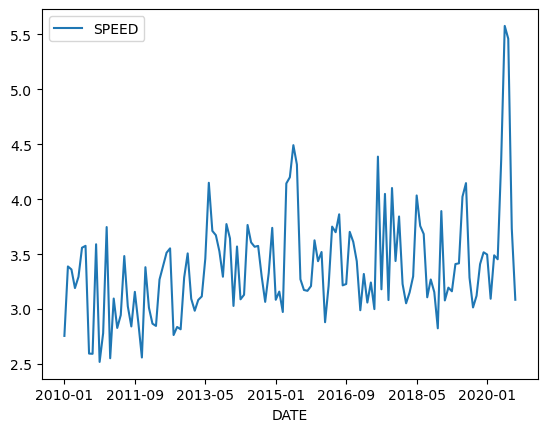

In [225]:
Datam=Data.groupby('DATE')['SPEED'].mean().reset_index()
Datam.plot('DATE','SPEED')

,DATE,Tavg
0,1948-01,-1.05
1,1948-02,0.67
2,1948-03,2.03
3,1948-04,9.86
4,1948-05,15.03
...,...,...
905,2023-06,21.88
906,2023-07,29.59
907,2023-08,26.04
908,2023-09,21.53


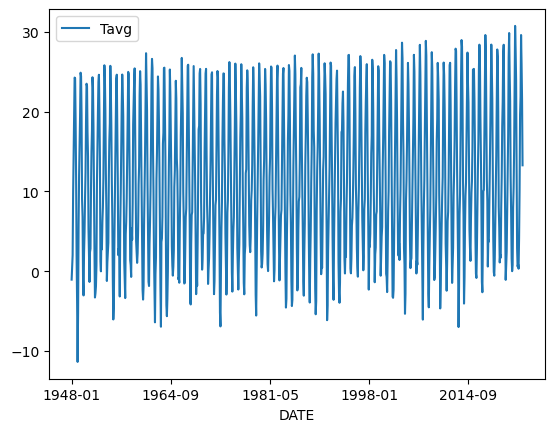

In [268]:
T=pd.read_csv("USW00024127.csv")
T_Date=T['DATE']
Tavg=T['TAVG']
Data=pd.concat([T_Date,Tavg],axis=1)
Data.columns=['DATE','Tavg']
Data.plot('DATE','Tavg')
Data

In [269]:
#some simple checks
#mean for  nearly 70 years
Ta=Data['Tavg'].mean()
Ta


11.504120879120878

In [270]:
#std
STD=Data['Tavg'].std()
STD

9.583888802768529

<Axes: xlabel='Year'>

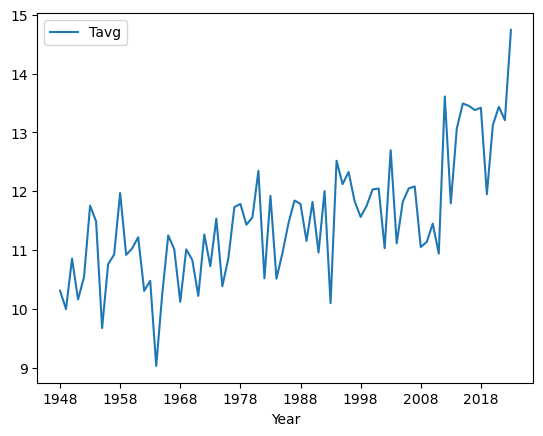

In [282]:
Data1=Data
#annual temperature
Data['Year']=Data['DATE'].str[0:4]
D=Data.groupby('Year')['Tavg'].mean().reset_index()
D.plot('Year','Tavg')
#Data.plot('Year','Tavg')

<Axes: xlabel='MON'>

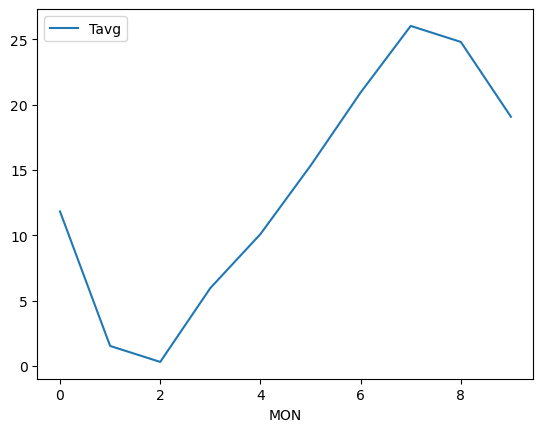

In [285]:
Data=Data1
#MONTHLY temperature
Data['MON']=Data['DATE'].str[6:7]
D=Data.groupby('MON')['Tavg'].mean().reset_index()

D.plot('MON','Tavg')

In [291]:
Data=Data1
#Find the coldest/hottest temperature
Data= Data.sort_values(by="Tavg",ascending=False)
Tmax=Data.iloc[0]['Tavg']
Tmax


30.73

In [292]:
Tmin=Data.iloc[-1]['Tavg']
Tmin

-11.36